In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-inequality-index/Gender_Inequality_Index.csv


In [3]:
data=pd.read_csv('/kaggle/input/gender-inequality-index/Gender_Inequality_Index.csv')

In [4]:
data.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


In [5]:
data.shape

(195, 11)

In [6]:
data.dtypes

Country                   object
Human_development         object
GII                      float64
Rank                     float64
Maternal_mortality       float64
Adolescent_birth_rate    float64
Seats_parliament         float64
F_secondary_educ         float64
M_secondary_educ         float64
F_Labour_force           float64
M_Labour_force           float64
dtype: object

In [7]:
data.isnull().sum()

Country                   0
Human_development         4
GII                      25
Rank                     25
Maternal_mortality       11
Adolescent_birth_rate     0
Seats_parliament          2
F_secondary_educ         18
M_secondary_educ         18
F_Labour_force           15
M_Labour_force           15
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.describe()

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
count,170.000000,170.000000,184.000000,195.000000,193.000000,177.000000,177.000000,180.000000,180.000000
mean,0.344376,85.376471,160.027174,44.597949,24.701554,62.706780,67.068362,50.224444,69.863333
std,0.197105,49.210206,233.028867,38.422479,12.404319,29.528487,26.450033,15.905491,9.012734
min,0.013000,1.000000,2.000000,1.600000,0.000000,6.400000,13.000000,6.000000,43.900000
25%,0.177500,43.250000,12.750000,10.750000,16.500000,37.700000,44.800000,42.400000,65.050000
50%,0.363000,85.500000,53.000000,36.200000,23.600000,69.900000,71.200000,52.150000,69.350000
75%,0.505750,127.750000,188.250000,64.200000,33.600000,90.200000,92.500000,60.475000,75.525000
max,0.820000,170.000000,1150.000000,170.500000,55.700000,100.000000,100.000000,83.100000,95.500000


In [10]:
data.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


In [11]:
import plotly.graph_objects as go

In [12]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.3 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=9fff5eb8127df3574e5e188f4cda9267bb33090a0d757e9fd8660f8c52be2245
  Stored in directory: /root/.cache/pip/wheels/e9/43/d9/de0427ef97aeac94f853545b02a8c07661abe1f44b64a0266d
Successfully built pycountry


In [13]:
import pycountry

In [14]:
input_countries = data['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country) for country in input_countries]

print(codes) 

['CHE', 'NOR', 'ISL', 'HKG', 'AUS', 'DNK', 'SWE', 'IRL', 'DEU', 'NLD', 'FIN', 'SGP', 'BEL', 'NZL', 'CAN', 'LIE', 'LUX', 'GBR', 'JPN', None, 'USA', 'ISR', 'MLT', 'SVN', 'AUT', 'ARE', 'ESP', 'FRA', 'CYP', 'ITA', 'EST', 'CZE', 'GRC', 'POL', 'BHR', 'LTU', 'SAU', 'PRT', 'LVA', 'AND', 'HRV', 'CHL', 'QAT', 'SMR', 'SVK', 'HUN', 'ARG', None, 'MNE', 'KWT', 'BRN', 'RUS', 'ROU', 'OMN', 'BHS', 'KAZ', 'TTO', 'CRI', 'URY', 'BLR', 'PAN', 'MYS', 'GEO', 'MUS', 'SRB', 'THA', 'ALB', 'BGR', 'GRD', 'BRB', 'ATG', 'SYC', 'LKA', 'BIH', 'KNA', None, 'UKR', 'MKD', 'CHN', 'DOM', None, 'PLW', 'CUB', 'PER', 'ARM', 'MEX', 'BRA', 'COL', 'VCT', 'MDV', 'DZA', 'AZE', 'TON', 'TKM', 'ECU', 'MNG', 'EGY', 'TUN', 'FJI', 'SUR', 'UZB', 'DMA', 'JOR', 'LBY', 'PRY', None, 'LCA', 'GUY', 'ZAF', 'JAM', 'WSM', 'GAB', 'LBN', 'IDN', 'VNM', 'PHL', 'BWA', None, 'KGZ', None, 'IRQ', 'TJK', 'BLZ', 'MAR', 'SLV', 'NIC', 'BTN', 'CPV', 'BGD', 'TUV', 'MHL', 'IND', 'GHA', None, 'GTM', 'KIR', 'HND', 'STP', 'NAM', 'LAO', 'TLS', 'VUT', 'NPL', 'SWZ',

In [15]:
data['ISO-Code']=codes

In [16]:
data

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,ISO-Code
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,CHE
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,NOR
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,ISL
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8,HKG
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...
190,South Sudan,Low,0.587,150.0,1150.0,99.2,32.3,26.5,36.4,70.4,73.6,SSD
191,North Korea,NaN,NaN,NaN,89.0,2.3,17.6,NaN,NaN,77.2,86.1,None
192,Monaco,NaN,NaN,NaN,NaN,7.2,33.3,NaN,NaN,NaN,NaN,MCO
193,Nauru,NaN,NaN,NaN,NaN,72.5,10.5,NaN,NaN,NaN,NaN,NRU


In [17]:
fig_1 = go.Figure(data=go.Choropleth(
    locations = data['ISO-Code'],
    z = data['Rank'],
    text = data['Country'],
    colorscale = 'Bluered',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Rank',
))

In [18]:
        
fig_1.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Human Deveopment Index Rank</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
   
)
    

In [19]:
fig = go.Figure(data=go.Choropleth(
    locations = data['ISO-Code'],
    z = data['Maternal_mortality'],
    text = data['Country'],
    colorscale = 'Inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Maternal_mortality',
))

In [20]:
        
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Maternal Mortality</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
   
)

In [21]:
fig_2 = go.Figure(data=go.Choropleth(
    locations = data['ISO-Code'],
    z = data['Adolescent_birth_rate'],
    text = data['Country'],
    colorscale = 'Inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))

In [22]:
        
fig_2.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Adolescent Birt Rate</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
   
)

In [23]:
fig_3 = go.Figure(data=go.Choropleth(
    locations = data['ISO-Code'],
    z = data['F_secondary_educ'],
    text = data['Country'],
    colorscale = 'Inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))
        
fig_3.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Female seconday Education</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
   
)

In [24]:
fig_3 = go.Figure(data=go.Choropleth(
    locations = data['ISO-Code'],
    z = data['GII'],
    text = data['Country'],
    colorscale = 'Inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))
        
fig_3.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b> Gender Ineguality</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
   
)

In [25]:
data.corr()

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
GII,1.000000,0.996755,0.713515,0.806791,-0.424116,-0.809278,-0.782130,-0.070970,0.158270
Rank,0.996755,1.000000,0.733578,0.820780,-0.419945,-0.811686,-0.781625,-0.050753,0.160078
Maternal_mortality,0.713515,0.733578,1.000000,0.745658,-0.147847,-0.697939,-0.642114,0.181069,0.043856
Adolescent_birth_rate,0.806791,0.820780,0.745658,1.000000,-0.118194,-0.721819,-0.685641,0.218276,0.197772
Seats_parliament,-0.424116,-0.419945,-0.147847,-0.118194,1.000000,0.150607,0.150915,0.231992,0.028370
F_secondary_educ,-0.809278,-0.811686,-0.697939,-0.721819,0.150607,1.000000,0.973213,-0.099089,-0.271339
M_secondary_educ,-0.782130,-0.781625,-0.642114,-0.685641,0.150915,0.973213,1.000000,-0.081615,-0.284792
F_Labour_force,-0.070970,-0.050753,0.181069,0.218276,0.231992,-0.099089,-0.081615,1.000000,0.492208
M_Labour_force,0.158270,0.160078,0.043856,0.197772,0.028370,-0.271339,-0.284792,0.492208,1.000000


<AxesSubplot:xlabel='GII', ylabel='Rank'>

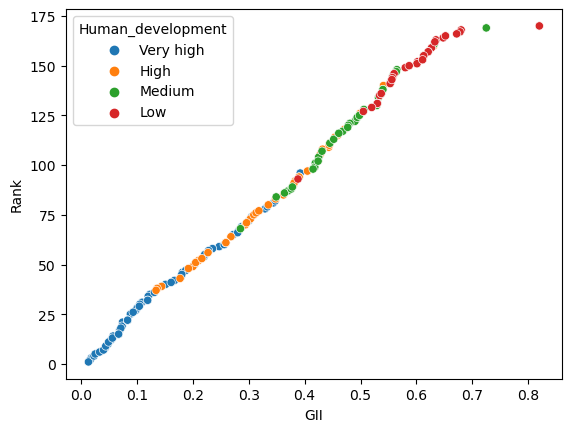

In [26]:
sns.scatterplot(data=data,x='GII',y='Rank',hue='Human_development')

<AxesSubplot:xlabel='F_secondary_educ', ylabel='M_secondary_educ'>

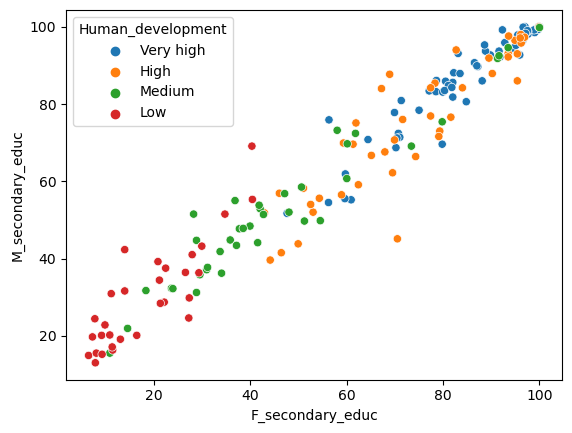

In [27]:
sns.scatterplot(data=data,x='F_secondary_educ',y='M_secondary_educ',hue='Human_development')

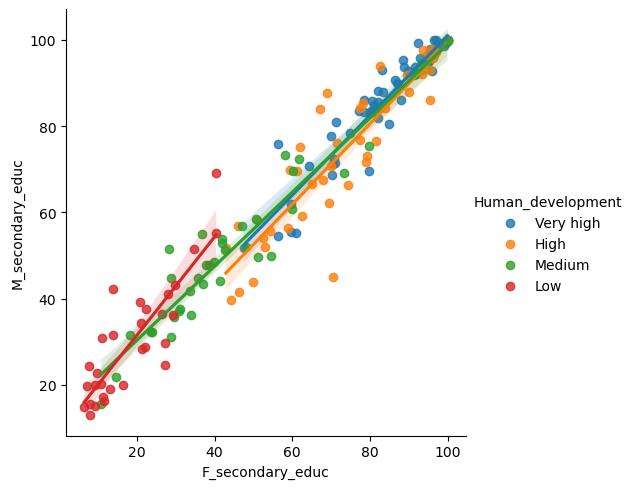

In [28]:
sns.lmplot(data=data,x='F_secondary_educ',y='M_secondary_educ',hue='Human_development')

<AxesSubplot:xlabel='F_Labour_force', ylabel='M_Labour_force'>

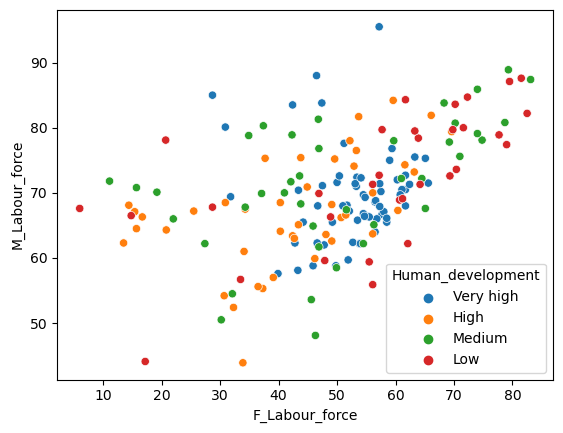

In [29]:
sns.scatterplot(data=data,x='F_Labour_force',y='M_Labour_force',hue='Human_development')

<AxesSubplot:xlabel='F_Labour_force', ylabel='F_secondary_educ'>

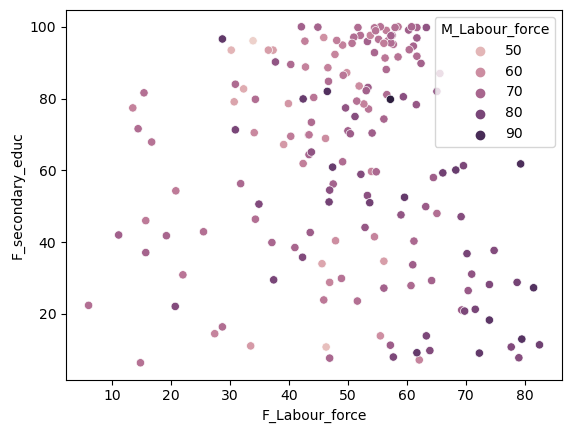

In [30]:
sns.scatterplot(data=data,x='F_Labour_force',y='F_secondary_educ',hue='M_Labour_force')

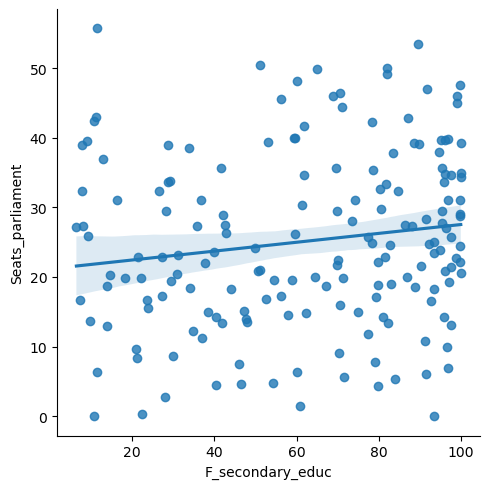

In [50]:
sns.lmplot(data=data,x='F_secondary_educ',y='Seats_parliament')

<AxesSubplot:xlabel='Maternal_mortality', ylabel='Count'>

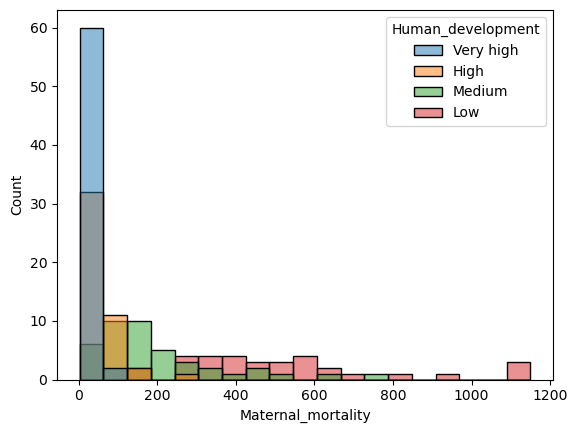

In [32]:
sns.histplot(data=data,x='Maternal_mortality',hue='Human_development')

<AxesSubplot:xlabel='F_secondary_educ', ylabel='Adolescent_birth_rate'>

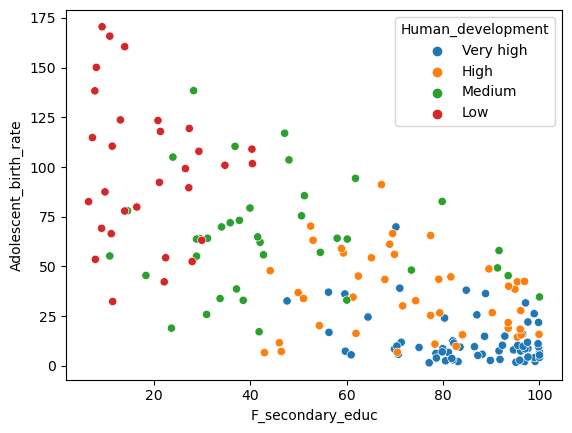

In [33]:
sns.scatterplot(data=data,x='F_secondary_educ',y='Adolescent_birth_rate',hue='Human_development')

<AxesSubplot:xlabel='M_secondary_educ', ylabel='Adolescent_birth_rate'>

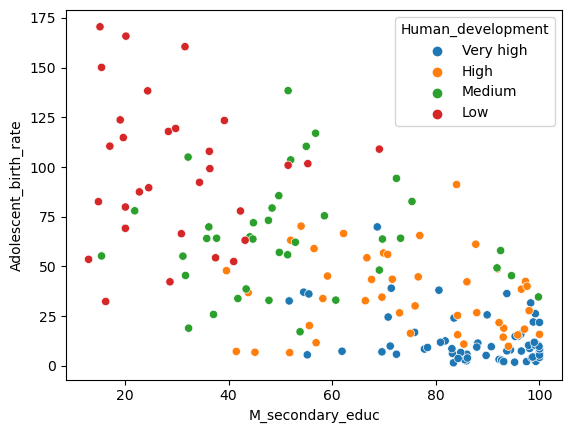

In [34]:
sns.scatterplot(data=data,x='M_secondary_educ',y='Adolescent_birth_rate',hue='Human_development')

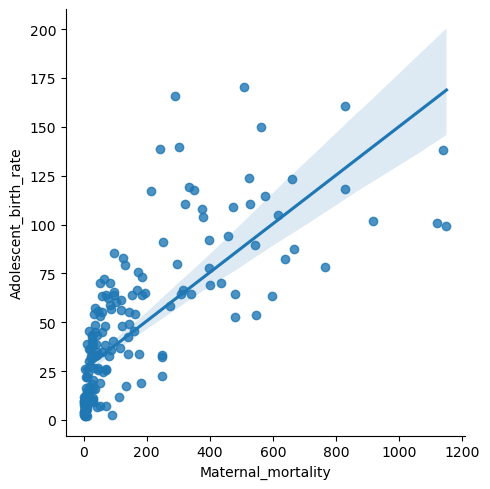

In [35]:
sns.lmplot(data=data,x='Maternal_mortality',y='Adolescent_birth_rate')

Text(0, 0.5, 'Labour')

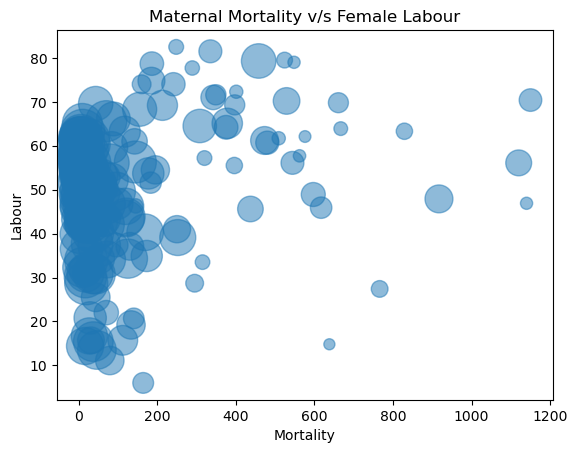

In [36]:
ax = (data
    .plot
    .scatter(x='Maternal_mortality', 
             y='F_Labour_force', 
             s=10*data['F_secondary_educ'],
             alpha=.5))
ax.set_title('Maternal Mortality v/s Female Labour')
ax.set_xlabel('Mortality')
ax.set_ylabel('Labour')

<AxesSubplot:xlabel='F_secondary_educ', ylabel='F_Labour_force'>

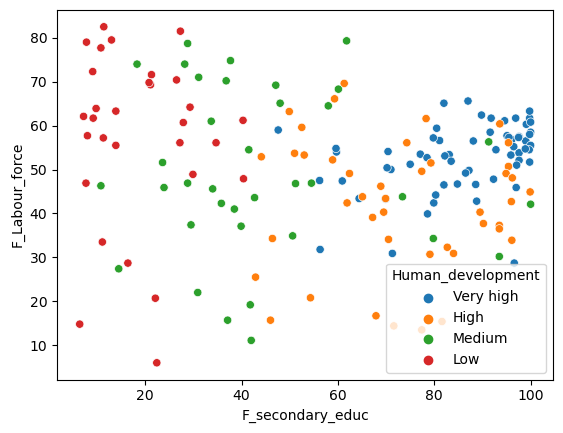

In [37]:
sns.scatterplot(data=data,x='F_secondary_educ',y='F_Labour_force',hue='Human_development')

<AxesSubplot:xlabel='Seats_parliament', ylabel='Count'>

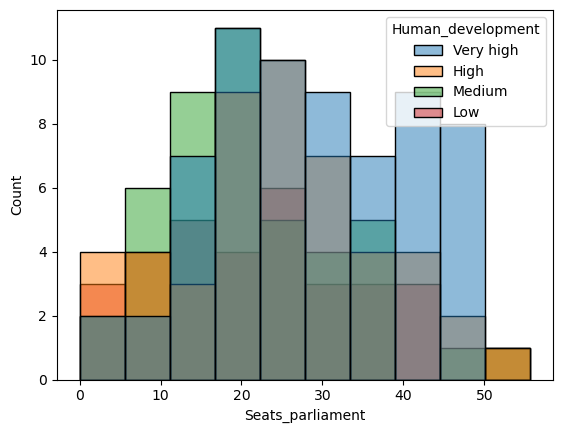

In [38]:
sns.histplot(data=data,x='Seats_parliament',hue='Human_development')

<AxesSubplot:xlabel='Human_development', ylabel='Seats_parliament'>

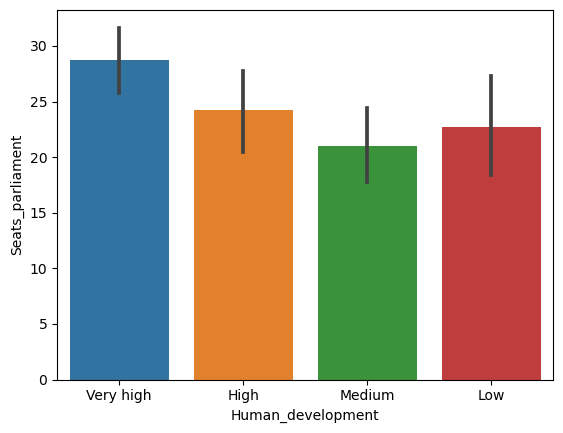

In [39]:
sns.barplot(data=data,x='Human_development',y='Seats_parliament')

<AxesSubplot:xlabel='M_secondary_educ', ylabel='M_Labour_force'>

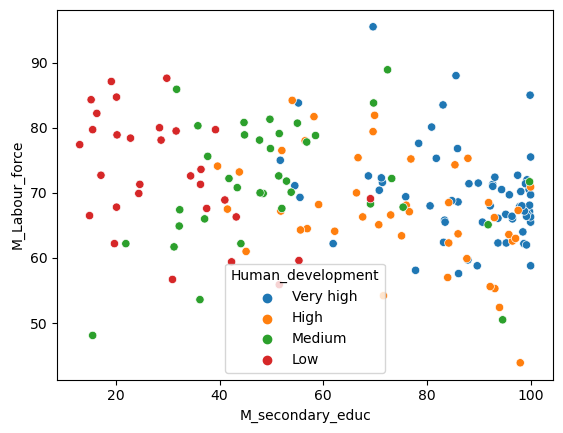

In [40]:
sns.scatterplot(data=data,x='M_secondary_educ',y='M_Labour_force',hue='Human_development')

<AxesSubplot:xlabel='M_Labour_force', ylabel='Adolescent_birth_rate'>

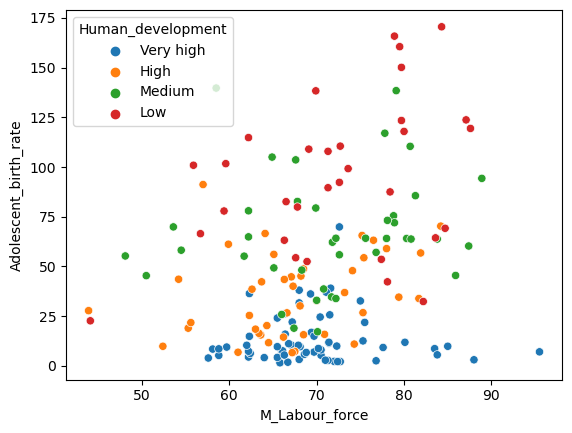

In [41]:
sns.scatterplot(data=data,y='Adolescent_birth_rate',x='M_Labour_force',hue='Human_development')

<AxesSubplot:xlabel='Human_development', ylabel='Adolescent_birth_rate'>

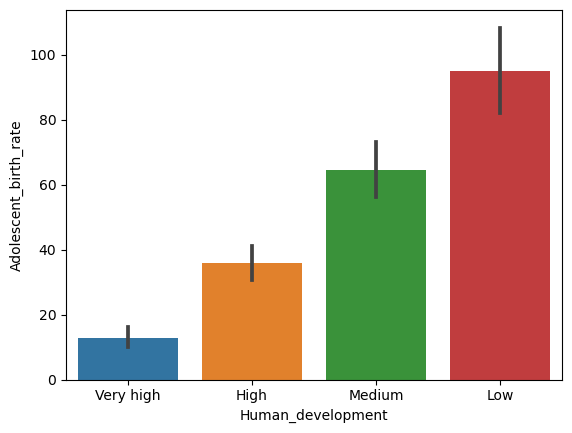

In [42]:
sns.barplot(data=data,x='Human_development',y='Adolescent_birth_rate')

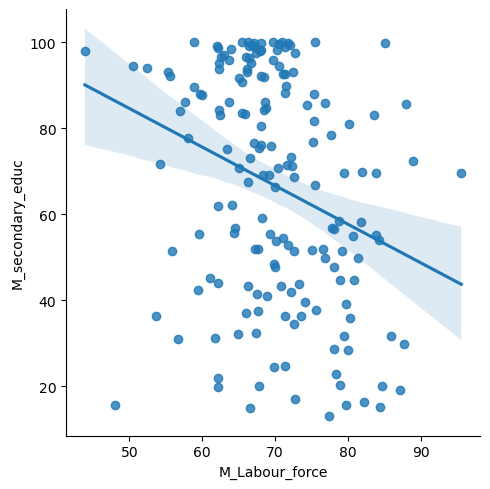

In [43]:
sns.lmplot(data=data,y='M_secondary_educ',x='M_Labour_force')

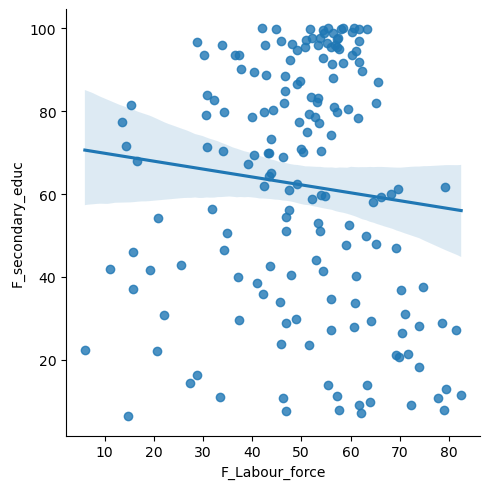

In [44]:
sns.lmplot(data=data,y='F_secondary_educ',x='F_Labour_force')

In [45]:
df_very_high=data[data['Human_development']=='Very high']
df_high= data[data['Human_development']=='High']
df_med=data[data['Human_development']=='Medium']
df_low=data[data['Human_development']=='Low']

<AxesSubplot:xlabel='Seats_parliament', ylabel='count'>

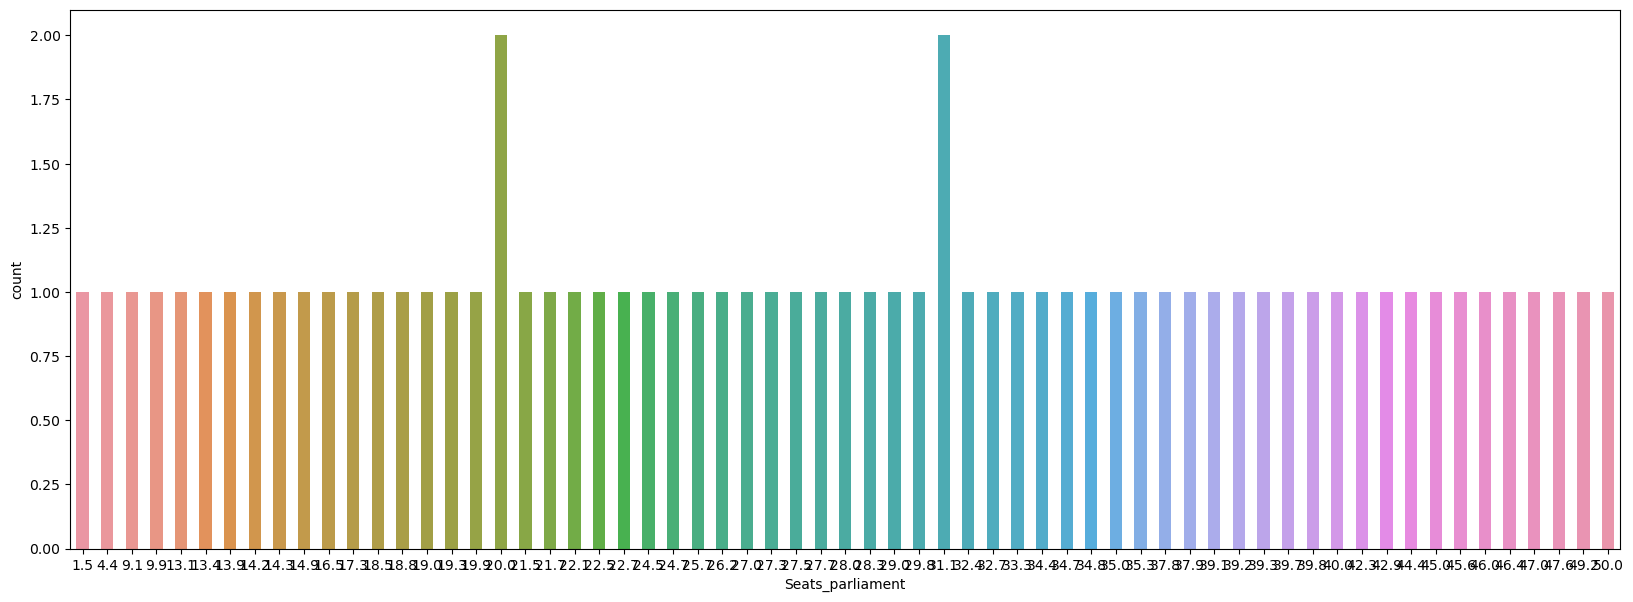

In [46]:
plt.figure(figsize=[20,7])
sns.countplot(data=df_very_high,x='Seats_parliament',width=0.5)

<AxesSubplot:xlabel='Seats_parliament', ylabel='count'>

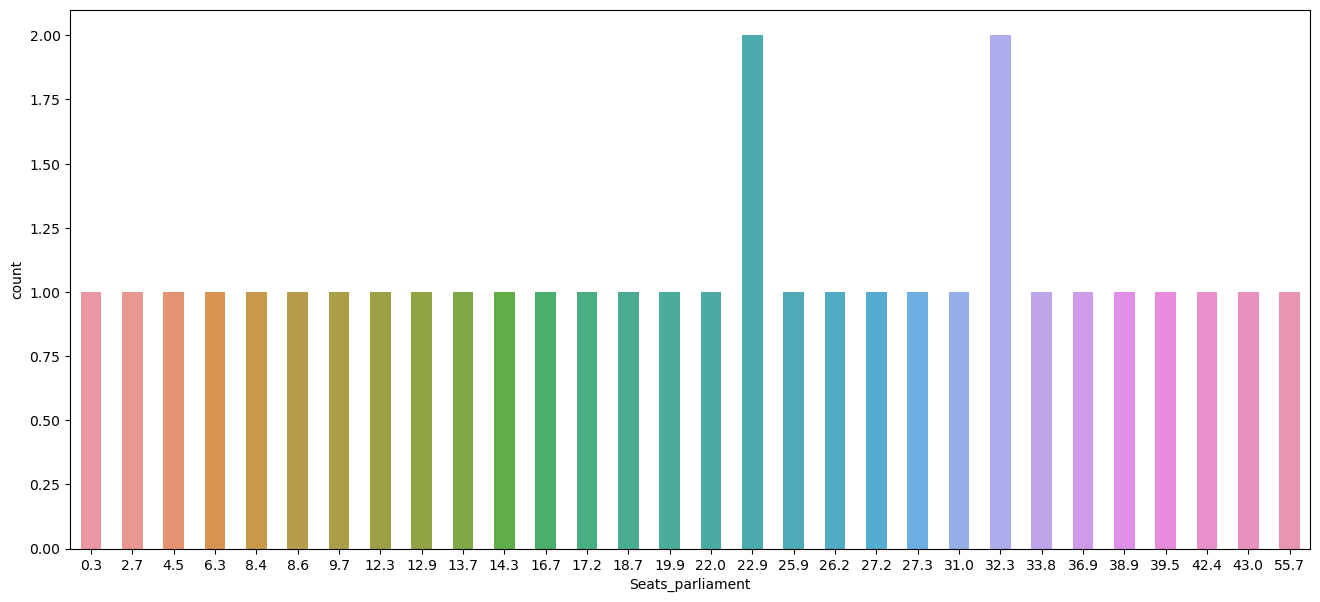

In [47]:
plt.figure(figsize=[16,7])
sns.countplot(data=df_low,x='Seats_parliament',width=0.5)

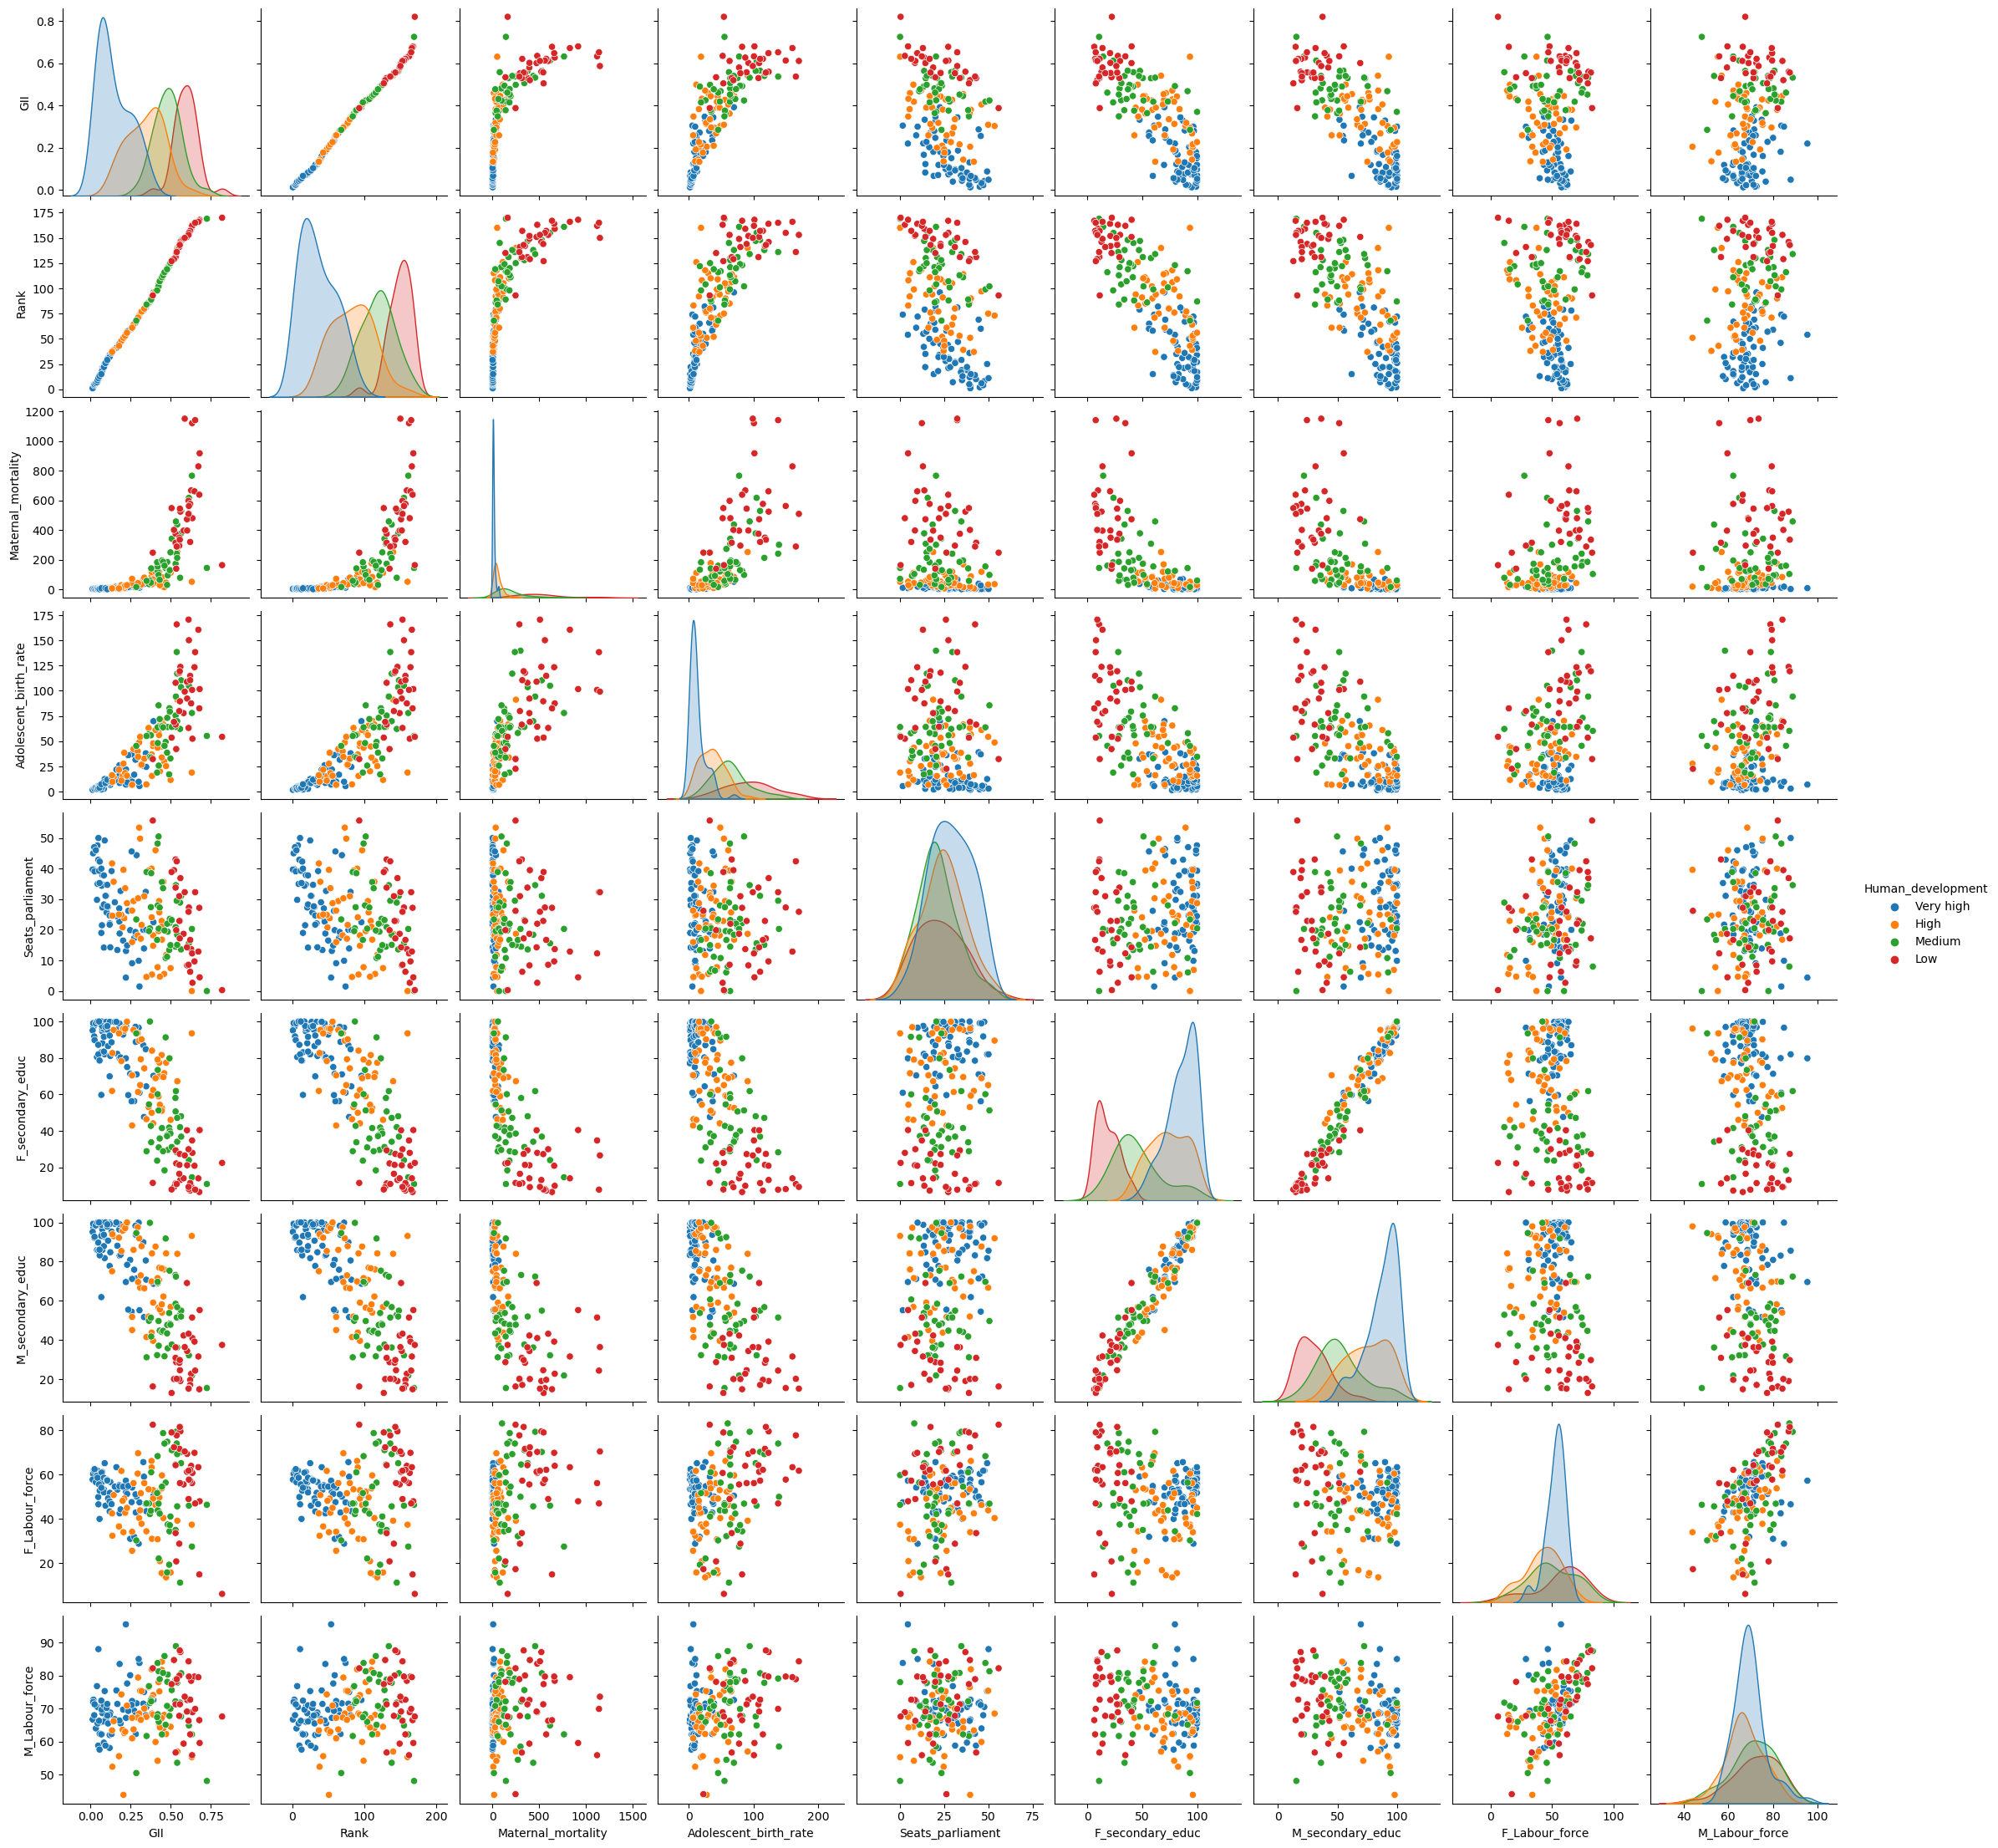

In [48]:
sns.pairplot(data,hue='Human_development')

## From The Above Data we Can Infer that
1. The countries with good HDI belong to the below-mentioned continents-
    * North America
    * Europe 
    * North Asia Subcontinent
    * Australia
2. Reasons for having a bad HDI are-
    * High Gender Inequality Index(GII)
3. But The GII itself is dependent majorly on the below-mentioned factors,
    * Female empowerment
            a. Female Health
            b. Education
    * Female labor force(Working women or women searching for work)
    * Political representation of the women  
4. Female Empowerment
    * The health of a female is dependent on the below-mentioned factors:
            a. Adolescent birth rate- From the data, it is inferred that the lower the education of a female, the earlier she is married to an individual. Also, if the male is less educated, a female is married to him irrespective of her educational background or history.
            b. Maternal Mortality - Maternal Mortality is highly related to the adolescent birth rate. More deaths during pregnancy are being observed in the case of teenagers.
            c. To decrease the number of adolescent births, secondary education for both males and females is necessary. A decrease in the Adolescent birth rate will automatically decrease maternal mortality.
5. Female Labour and Political representation-
    * Women are working irrespective of educational background. This means that some are engaging in physical work like labor, and the educated ones have jobs.
    * Political representation with a low female secondary education rate is not increasing the development index. We need female political representation with higher rates of female secondary education.
